<a href="https://colab.research.google.com/github/ritikumra/GDSC-Task/blob/main/GDSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GDSC Prerequisite Task**

## **Load Data**

In [3]:
  import pandas as pd

  df= pd.read_csv('https://raw.githubusercontent.com/ritikumra/GDSC-Task/main/laptopData.csv')

  

##**Data Preparation**


In [25]:
df=df.dropna()

### Dataset splitting

In [26]:
y = df[ 'Amount']
y

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Amount, Length: 1210, dtype: float64

In [27]:
x = df.drop(['S_No','Amount'],axis=1)
x

,Brand Name,Category,Screen Size,Screen Resolution,CPU,RAM,Memory,GPU,OS,Mass(in kg)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg


In [49]:
print(x.dtypes)

Brand Name             int64
Category               int64
Screen Size           object
Screen Resolution      int64
CPU                    int64
RAM                  float64
Memory                 int64
GPU                    int64
OS                     int64
Mass(in kg)           object
dtype: object


###Changing Datatypes of Columns that are categorical or have units

####Brand Name

In [29]:
import numpy as np

x['Brand Name'].unique()


array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

####Category

In [30]:
from sklearn import preprocessing

label= preprocessing.LabelEncoder()
x['Brand Name']= label.fit_transform(x['Brand Name'])
x['Brand Name'].unique()

array([ 1,  7,  0,  2,  4, 10,  3, 11, 13, 16,  8, 18, 17, 14, 12, 15,  6,
        5,  9])

In [31]:
x['Category'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [32]:
x['Category'] = label.fit_transform(x['Category'])
x['Category'].unique

<bound method Series.unique of 0       4
1       4
2       3
3       4
4       4
       ..
1298    0
1299    0
1300    3
1301    3
1302    3
Name: Category, Length: 1210, dtype: int64>

####Screen Resolution

In [33]:
x['Screen Resolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160', '4K Ultra HD 3840x2160',
       'Touchscreen 1366x768', 'Touchscreen 2560x1440',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ 3200x1800',
       'IPS Panel Qua

In [34]:
x['Screen Resolution'] = label.fit_transform(x['Screen Resolution'])
x['Screen Resolution'].unique

<bound method Series.unique of 0       22
1        1
2        8
3       24
4       22
        ..
1298    13
1299    18
1300     0
1301     0
1302     0
Name: Screen Resolution, Length: 1210, dtype: int64>

####CPU

In [35]:
x['CPU'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 2.9GHz', 'Intel Core i3 7100U 2.4GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GHz', 'Intel Core i7 7500U 2.7GHz',
 

In [36]:
x['CPU'] = label.fit_transform(x['CPU'])
x['CPU'].unique

<bound method Series.unique of 0       61
1       59
2       70
3       81
4       63
        ..
1298    85
1299    85
1300    32
1301    85
1302    32
Name: CPU, Length: 1210, dtype: int64>

####RAM


In [37]:
x['RAM'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '64GB', '6GB', '0GB',
       '50486GB', '32GB', '1000GB', '24GB', '6304GB', '1GB'], dtype=object)

In [38]:
x['RAM']=x['RAM'].str.replace(r'\D+','', regex=True).astype(float)

####Memory

In [39]:
x['Memory'] = label.fit_transform(x['Memory'])
x['Memory'].unique

<bound method Series.unique of 0        4
1        2
2       16
3       28
4       16
        ..
1298     4
1299    28
1300    34
1301    10
1302    25
Name: Memory, Length: 1210, dtype: int64>

####GPU

In [40]:
x['GPU'] = label.fit_transform(x['GPU'])
x['GPU'].unique

<bound method Series.unique of 0       57
1       50
2       52
3        9
4       58
        ..
1298    46
1299    46
1300    39
1301    21
1302    39
Name: GPU, Length: 1210, dtype: int64>

####OS

In [41]:
x['OS'] = label.fit_transform(x['OS'])
x['OS'].unique

<bound method Series.unique of 0       8
1       8
2       4
3       8
4       8
       ..
1298    5
1299    5
1300    5
1301    5
1302    5
Name: OS, Length: 1210, dtype: int64>

####Mass

In [ ]:
x['Mass(in kg)'] = x['Mass(in kg)'].str.replace("kg", "")
print(x.dtypes)


###**Imputing Missing Values**

In [58]:
from sklearn.impute import SimpleImputer
x = x.replace('?', np.nan)
imp = SimpleImputer(strategy="most_frequent")
x=imp.fit_transform(x)

###**Making training and test sets**

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 100)

In [60]:
x_train

array([[10, 4, '14', ..., 72, 5, '1.7'],
       [4, 3, '15.6', ..., 20, 7, '2.24'],
       [12, 3, '13.3', ..., 39, 5, '1.35'],
       ...,
       [10, 3, '14', ..., 70, 5, '1.5'],
       [2, 1, '15.6', ..., 77, 5, '2.2'],
       [7, 0, '13.3', ..., 52, 5, '1.28']], dtype=object)

In [61]:
x_test

array([[4, 3, '15.6', ..., 22, 5, '2.18'],
       [7, 3, '14', ..., 52, 5, '1.95'],
       [7, 0, '13.3', ..., 52, 5, '1.28'],
       ...,
       [10, 3, '15.6', ..., 70, 5, '2.3'],
       [7, 1, '17.3', ..., 77, 5, '3.35'],
       [7, 3, '13.3', ..., 52, 5, '1.49']], dtype=object)

##**Model**

###**Linear Regression**

####Training the model

In [62]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

####Applying the model

In [63]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
y_lr_train_pred

In [ ]:
y_lr_test_pred

####Evaluate model performance

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse= mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2= r2_score(y_train, y_lr_train_pred)

lr_test_mse= mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2= r2_score(y_test, y_lr_test_pred)


In [74]:
print('LR MSE (Train):' , lr_train_mse)
print('LR R2 (Train):' , lr_train_r2)
print('LR MSE (Test):' , lr_test_mse)
print('LR R2 (Test):' , lr_test_r2)

LR MSE (Train): 29224321646367.633
LR R2 (Train): 0.007420974223987575
LR MSE (Test): 3.0144156244647364e+16
LR R2 (Test): -0.004888386173623749


In [79]:
lr_result = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()

lr_result.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE' , 'Test R2' ]

In [80]:
lr_result

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,29224321646367.632812,0.007421,30144156244647364.0,-0.004888


###**Random Forest**

#### Training the model

In [81]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor( max_depth=2, random_state=100) 
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

#### Applying the model to make a prediction

In [82]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

#### Evaluate model performance

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse= mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2= r2_score(y_train, y_rf_train_pred)

rf_test_mse= mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2= r2_score(y_test, y_rf_test_pred)

In [84]:
print('RF MSE (Train):' , rf_train_mse)
print('RF R2 (Train):' , rf_train_r2)
print('RF MSE (Test):' , rf_test_mse)
print('RF R2 (Test):' , rf_test_r2)

RF MSE (Train): 26991690360520.008
RF R2 (Train): 0.08325038143622032
RF MSE (Test): 3.014200352831032e+16
RF R2 (Test): -0.004816623022309674


In [85]:
rf_result = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()

rf_result.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE' , 'Test R2' ]

In [86]:
rf_result

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,26991690360520.007812,0.08325,30142003528310320.0,-0.004817


##**Model Comparison**

In [89]:
df_models= pd.concat([lr_result, rf_result], axis=0)
df_models
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,29224321646367.632812,0.007421,30144156244647364.0,-0.004888
1,Random Forest,26991690360520.007812,0.08325,30142003528310320.0,-0.004817


##**Data Visualisation of prediction results**

Text(0.5, 0, ' Actual Amount')

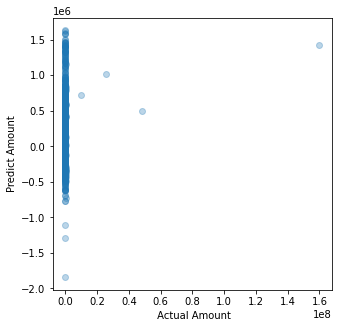

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(x= y_train, y= y_lr_train_pred, alpha= 0.3)



plt.plot()
plt.ylabel('Predict Amount')
plt.xlabel(' Actual Amount')